In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = (lats, lngs)
lat_lngs 

(array([ 81.34904503, -55.56668369, -54.16218363, ..., -74.78354463,
         15.06450523,   2.90297444]),
 array([-120.82993275,  -29.06992238,   33.63114322, ...,   92.42573933,
         -25.85369764,  -35.84535073]))

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
print(coordinates)

[(-66.12229856747217, 75.01362274134755), (43.958757322509115, 38.92989419968316), (-65.96751788631704, -47.649877034155026), (61.23009315866051, 40.46100598404749), (-15.278672284620626, 157.9822017359682), (-3.233135463177973, 130.8489007071629), (73.71796678390982, 28.245797515321016), (77.89281030097027, 38.11215344793996), (-55.88977518490332, 93.10939006356944), (-36.100702445863845, -11.510875688611975), (-35.45729844826391, -108.02742775764514), (-16.98179576539563, -176.177242576581), (65.35711772586146, -113.67333450475319), (-3.922075081195999, 103.78705908584055), (7.735319307480893, 33.87784651730635), (-54.840406822036314, 118.86229699328715), (2.776709230125192, 56.78801395810325), (-40.00807417142202, -156.4882430596192), (83.49999992527776, -96.43590632729921), (87.93922428938453, -50.781617596161766), (-20.942614572446843, 162.40165902857223), (-60.78075761268253, -143.12085530281666), (-52.86120006091873, 162.75295650449118), (-89.95071156727218, 97.90024563148512), 

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1dad39209ae55b023467b6c52e54242


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | tuapse
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | konosha
Processing Record 5 of Set 1 | honiara
Processing Record 6 of Set 1 | amahai
Processing Record 7 of Set 1 | mehamn
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | lahat
Processing Record 15 of Set 1 | gambela
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | poum
Processing Record 21 of Set 1 | tuatapere
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set 1 | port alfred
Processing Record 2

City not found. Skipping...
Processing Record 44 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 45 of Set 4 | qeshm
Processing Record 46 of Set 4 | ontario
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | tobol
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | sakakah
Processing Record 1 of Set 5 | mayor pablo lagerenza
Processing Record 2 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | maua
Processing Record 5 of Set 5 | muskogee
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | tambul
City not found. Skipping...
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | semey
Processing Record 11 of Set 5 | balassagyarmat
Processing Record 12 of Set 5 | sao filipe
Processing Record 13 of Set 5 | georgetown
Processing Record 14 of Set 5 | r

Processing Record 28 of Set 8 | ocampo
Processing Record 29 of Set 8 | geraldton
Processing Record 30 of Set 8 | tchollire
Processing Record 31 of Set 8 | cayenne
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | san angelo
Processing Record 34 of Set 8 | kaputa
Processing Record 35 of Set 8 | sao miguel do araguaia
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | ciudad guayana
Processing Record 39 of Set 8 | aldama
Processing Record 40 of Set 8 | copiapo
Processing Record 41 of Set 8 | gilgit
Processing Record 42 of Set 8 | bermeo
Processing Record 43 of Set 8 | makakilo city
Processing Record 44 of Set 8 | nelson bay
Processing Record 45 of Set 8 | vanavara
Processing Record 46 of Set 8 | bonthe
Processing Record 47 of Set 8 | raga
Processing Record 48 of Set 8 | mlonggo
Processing Record 49 of Set 8 | balarampur
Processing Record 50 of Set 8 | tura
Processing Record 1 

Processing Record 14 of Set 12 | andselv
City not found. Skipping...
Processing Record 15 of Set 12 | tungkang
City not found. Skipping...
Processing Record 16 of Set 12 | alto araguaia
Processing Record 17 of Set 12 | axim
Processing Record 18 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 19 of Set 12 | sanandaj
Processing Record 20 of Set 12 | luderitz
Processing Record 21 of Set 12 | wairoa
Processing Record 22 of Set 12 | balikpapan
Processing Record 23 of Set 12 | iracoubo
Processing Record 24 of Set 12 | tevaitoa
Processing Record 25 of Set 12 | marsa matruh
Processing Record 26 of Set 12 | port moresby
Processing Record 27 of Set 12 | hennebont
Processing Record 28 of Set 12 | sitrah
Processing Record 29 of Set 12 | challans
Processing Record 30 of Set 12 | pitiquito
Processing Record 31 of Set 12 | skjervoy
Processing Record 32 of Set 12 | pedernales
Processing Record 33 of Set 12 | kodinsk
Processing Record 34 of Set 12 | benjamin constant
Proces

In [12]:
len(city_data)

561

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,71.22,78,39,8.66,RE,2022-04-17 01:38:27
1,Tuapse,44.1125,39.0742,48.00,74,90,5.01,RU,2022-04-17 01:38:28
2,Ushuaia,-54.8000,-68.3000,37.06,81,0,4.61,AR,2022-04-17 01:36:54
3,Konosha,60.9736,40.2570,16.61,98,63,2.06,RU,2022-04-17 01:38:28
4,Honiara,-9.4333,159.9500,85.96,66,97,4.50,SB,2022-04-17 01:38:29
5,Amahai,-3.3333,128.9167,87.39,61,85,2.44,ID,2022-04-17 01:38:29
6,Mehamn,71.0357,27.8492,37.33,89,100,29.53,NO,2022-04-17 01:38:30
7,Busselton,-33.6500,115.3333,63.77,47,52,10.69,AU,2022-04-17 01:37:00
8,Jamestown,42.0970,-79.2353,38.79,53,40,12.66,US,2022-04-17 01:38:31
9,Rikitea,-23.1203,-134.9692,78.82,68,32,12.93,PF,2022-04-17 01:36:52


In [51]:
new_column_order=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df = pd.DataFrame(new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-04-17 01:38:27,-21.3585,55.7679,71.22,78,39,8.66
1,Tuapse,RU,2022-04-17 01:38:28,44.1125,39.0742,48.00,74,90,5.01
2,Ushuaia,AR,2022-04-17 01:36:54,-54.8000,-68.3000,37.06,81,0,4.61
3,Konosha,RU,2022-04-17 01:38:28,60.9736,40.2570,16.61,98,63,2.06
4,Honiara,SB,2022-04-17 01:38:29,-9.4333,159.9500,85.96,66,97,4.50
5,Amahai,ID,2022-04-17 01:38:29,-3.3333,128.9167,87.39,61,85,2.44
6,Mehamn,NO,2022-04-17 01:38:30,71.0357,27.8492,37.33,89,100,29.53
7,Busselton,AU,2022-04-17 01:37:00,-33.6500,115.3333,63.77,47,52,10.69
8,Jamestown,US,2022-04-17 01:38:31,42.0970,-79.2353,38.79,53,40,12.66
9,Rikitea,PF,2022-04-17 01:36:52,-23.1203,-134.9692,78.82,68,32,12.93


In [49]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

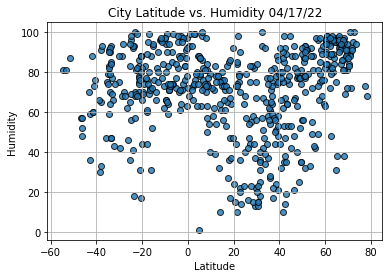

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

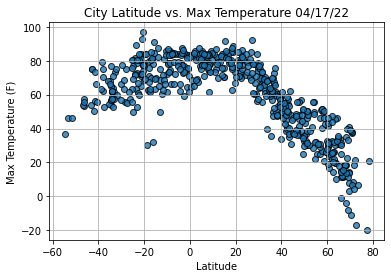

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

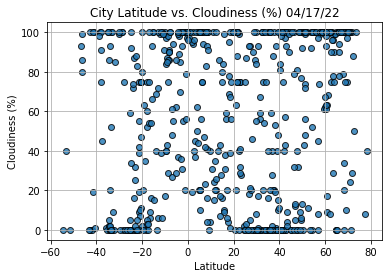

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

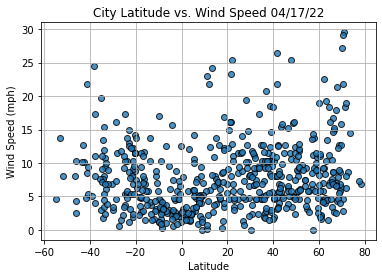

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()